In [13]:
import pandas as pd

word_list = pd.read_csv("outputs/creative_wordlist_v2.tsv",sep="\t",index_col=0)
word_list.duplicated().any()

False

In [2]:
import itertools
words = list(itertools.chain.from_iterable(word_list['output'].str.split(',').tolist()))
words = [w.strip() for w in words]
words

['Samantha',
 'Paris',
 'Lawrence',
 'Dancing',
 'Miko',
 'Library',
 'Nolan',
 'Studying',
 'Corinne',
 'Beach',
 'Elijah',
 'Surfing',
 'Ava',
 'Farm',
 'Finn',
 'Gardening',
 'Theodore',
 'Gym',
 'Emily',
 'Boxing',
 'Ingrid',
 'Office',
 'Trevor',
 'Typing',
 'Archie',
 'Mountain',
 'Sophie',
 'Hiking',
 'Eunice',
 'Kitchen',
 'Ian',
 'Cooking',
 'Mateo',
 'Theater',
 'Hazel',
 'Acting',
 'Garrett',
 'Garage',
 'Luna',
 'Repairing',
 'Oliver',
 'Library',
 'Emily',
 'Jogging',
 'Samantha',
 'Diner',
 'George',
 'Painting',
 'Lucas',
 'Beach',
 'Sarah',
 'Swimming',
 'Jenna',
 'Ski-Resort',
 'Derek',
 'Dancing',
 'Liam',
 'Gym',
 'Amelia',
 'Singing',
 'Tyler',
 'Nightclub',
 'Victoria',
 'Cooking',
 'Molly',
 'Coffee-Shop',
 'Zack',
 'Studying',
 'Brian',
 'Office',
 'Jessica',
 'Arguing',
 'Nina',
 'Park',
 'Martin',
 'Reading',
 'Laura',
 'Forest',
 'Alex',
 'Exploring',
 'Liam',
 'Paris',
 'Emily',
 'Running',
 'Sophia',
 'Beach',
 'Ethan',
 'Swimming',
 'Oliver',
 'Library',
 '

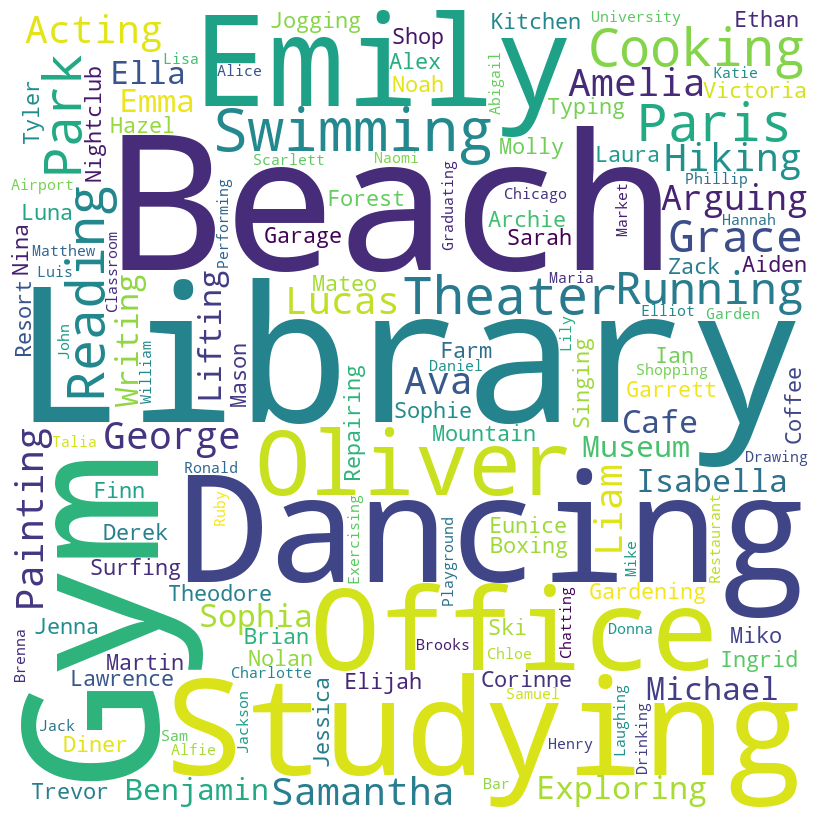

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(" ".join(words))
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [10]:
# import nltk

# def count_pos(words):
#     nltk.download('averaged_perceptron_tagger')
#     tagged_words = nltk.pos_tag(words)
#     noun_count = 0
#     verb_count = 0
#     for word, pos in tagged_words:
#         if pos.startswith('NN'):
#             noun_count += 1
#         elif pos.startswith('VB'):
#             verb_count += 1
#     return {'noun_count': noun_count, 'verb_count': verb_count}

import spacy
import numpy

def count_verbs_nouns(words):
    nlp = spacy.load("en_core_web_trf")
    doc = nlp(" ".join(words))
    
    verb_count = 0
    noun_count = 0
    
    for token in doc:
        if token.pos_ == "VERB":
            verb_count += 1
        elif token.pos_ == "PROPN":
            noun_count += 1
    
    return verb_count, noun_count, doc

verb_count, noun_count, doc = count_verbs_nouns(words)
print(verb_count, noun_count)

31 171
